In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Load the Dataset
# Simulate a dataset for house prices
data = {
    'Size': [1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200, 3500],
    'Location': [1, 2, 1, 3, 2, 3, 1, 2, 3, 1],  # 1: Urban, 2: Suburban, 3: Rural
    'Amenities': [3, 4, 2, 5, 4, 3, 2, 5, 4, 3],  # Number of amenities
    'Price': [250000, 300000, 280000, 400000, 380000, 450000, 320000, 420000, 500000, 480000]
}
df = pd.DataFrame(data)

# Display the dataset
print(df.head())

   Size  Location  Amenities   Price
0  1200         1          3  250000
1  1500         2          4  300000
2  1800         1          2  280000
3  2000         3          5  400000
4  2200         2          4  380000


In [4]:
# Step 2: Clean the Data
# Check for missing values
print(df.isnull().sum())

# Handle outliers (if any)
# For simplicity, assume no outliers in this small dataset

Size         0
Location     0
Amenities    0
Price        0
dtype: int64


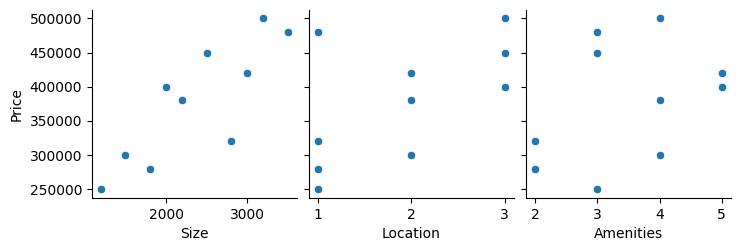

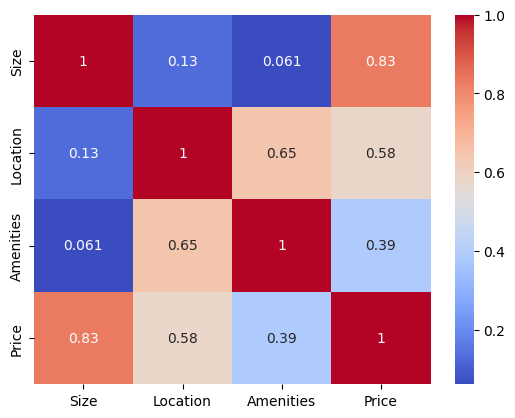

In [5]:
# Step 3: Exploratory Data Analysis (EDA)
# Visualize relationships
sns.pairplot(df, x_vars=['Size', 'Location', 'Amenities'], y_vars='Price', kind='scatter')
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Step 4: Split the Data
X = df[['Size', 'Location', 'Amenities']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 5: Train Regression Models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [8]:
# Step 6: Evaluate the Model
# Linear Regression Evaluation
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr}, R²: {r2_lr}")

# Random Forest Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

Linear Regression - RMSE: 8056.84348136032, R²: 0.9935087273116862
Random Forest - RMSE: 57362.444159920524, R²: 0.670955


In [9]:
# Step 7: Fine-Tune the Model
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest - RMSE: {rmse_best_rf}, R²: {r2_best_rf}")

Best Random Forest - RMSE: 103271.4634168123, R²: -0.0664995156249999
